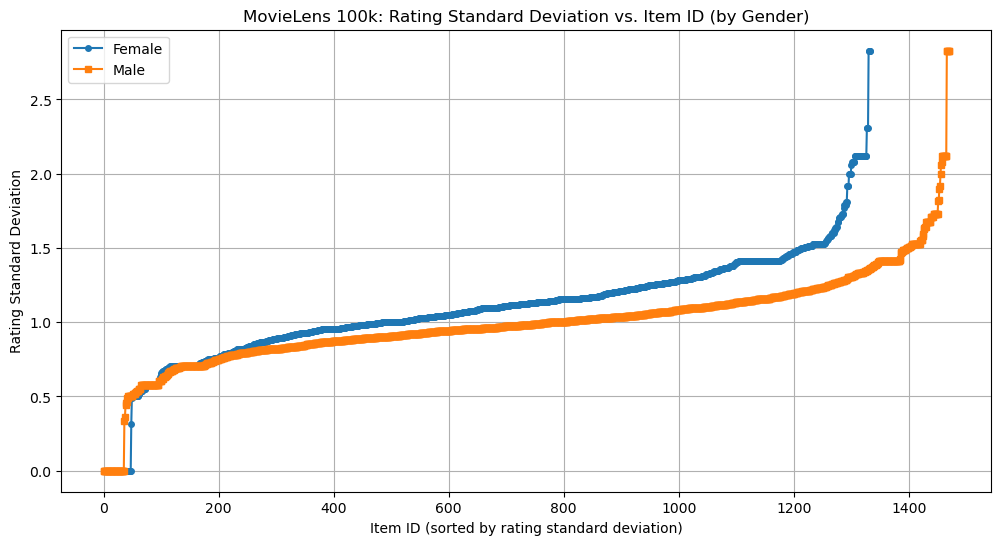

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load MovieLens 100k dataset
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('data/ml-100k/u.data', sep='\t', names=column_names, engine='python')

# Load user data to get gender information
user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=user_columns, engine='python')

# Merge ratings with user data
df = df.merge(users[['user_id', 'gender']], on='user_id')

# Compute standard deviation of ratings for each item for female and male users separately
item_std_female = df[df['gender'] == 'F'].groupby('item_id')['rating'].std().dropna()
item_std_male = df[df['gender'] == 'M'].groupby('item_id')['rating'].std().dropna()

# Sort by standard deviation
item_std_female_sorted = item_std_female.sort_values(ascending=True)
item_std_male_sorted = item_std_male.sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(range(len(item_std_female_sorted)), item_std_female_sorted.values, marker='o', linestyle='-', markersize=4, label='Female')
plt.plot(range(len(item_std_male_sorted)), item_std_male_sorted.values, marker='s', linestyle='-', markersize=4, label='Male')
plt.xlabel('Item ID (sorted by rating standard deviation)')
plt.ylabel('Rating Standard Deviation')
plt.title('MovieLens 100k: Rating Standard Deviation vs. Item ID (by Gender)')
plt.legend()
plt.grid(True)
plt.show()

